In [37]:
#importing the libraies required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
#to display all columns
pd.set_option('display.max_columns',100)

In [39]:
#reading the csv file and saving it to df variable
df = pd.read_csv('sample_data_intw.csv')

In [41]:
df.head() #displaying first 5 instances of the dataset

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [42]:
#shape of the dataset(df)
df.shape

(209593, 37)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

# Data Preprocessing

In [44]:
df.isnull().sum()  #checking for null values, if any.

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [45]:
#dropping unnecessary columns: Unnamed:0, msisdn(mobile no.), pcircle(telecom circle), pdate(date)

df.drop(['Unnamed: 0', 'msisdn', 'pcircle', 'pdate'], axis = 1, inplace = True)  

In [46]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [47]:
#finding correlation between all features and the target variable('label')

df.corr()['label']

label                   1.000000
aon                    -0.003785
daily_decr30            0.168298
daily_decr90            0.166150
rental30                0.058085
rental90                0.075521
last_rech_date_ma       0.003728
last_rech_date_da       0.001711
last_rech_amt_ma        0.131804
cnt_ma_rech30           0.237331
fr_ma_rech30            0.001330
sumamnt_ma_rech30       0.202828
medianamnt_ma_rech30    0.141490
medianmarechprebal30   -0.004829
cnt_ma_rech90           0.236392
fr_ma_rech90            0.084385
sumamnt_ma_rech90       0.205793
medianamnt_ma_rech90    0.120855
medianmarechprebal90    0.039300
cnt_da_rech30           0.003827
fr_da_rech30           -0.000027
cnt_da_rech90           0.002999
fr_da_rech90           -0.005418
cnt_loans30             0.196283
amnt_loans30            0.197272
maxamnt_loans30         0.000248
medianamnt_loans30      0.044589
cnt_loans90             0.004733
amnt_loans90            0.199788
maxamnt_loans90         0.084144
medianamnt

#### Below menttioned independent columns/features have almost 0 correlation with the Target Variable('label'), so dropping them won't affect the results.

In [48]:
df.drop(['aon', 'cnt_da_rech30', 'fr_da_rech30','cnt_da_rech90','fr_da_rech90'], axis = 1, inplace = True)

In [49]:
df.head()

,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [50]:
df.shape

(209593, 28)

In [51]:
#splitting dataset into data(X) and Target attribute(y)

X = df.iloc[:,1:]

y =df['label']

In [52]:
X.head()

,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


## Splitting the Dataset into Training and Testing Set

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [54]:
print(X_train.shape)
print(X_test.shape)

(167674, 27)
(41919, 27)


### Visualising the inter-column correlation 

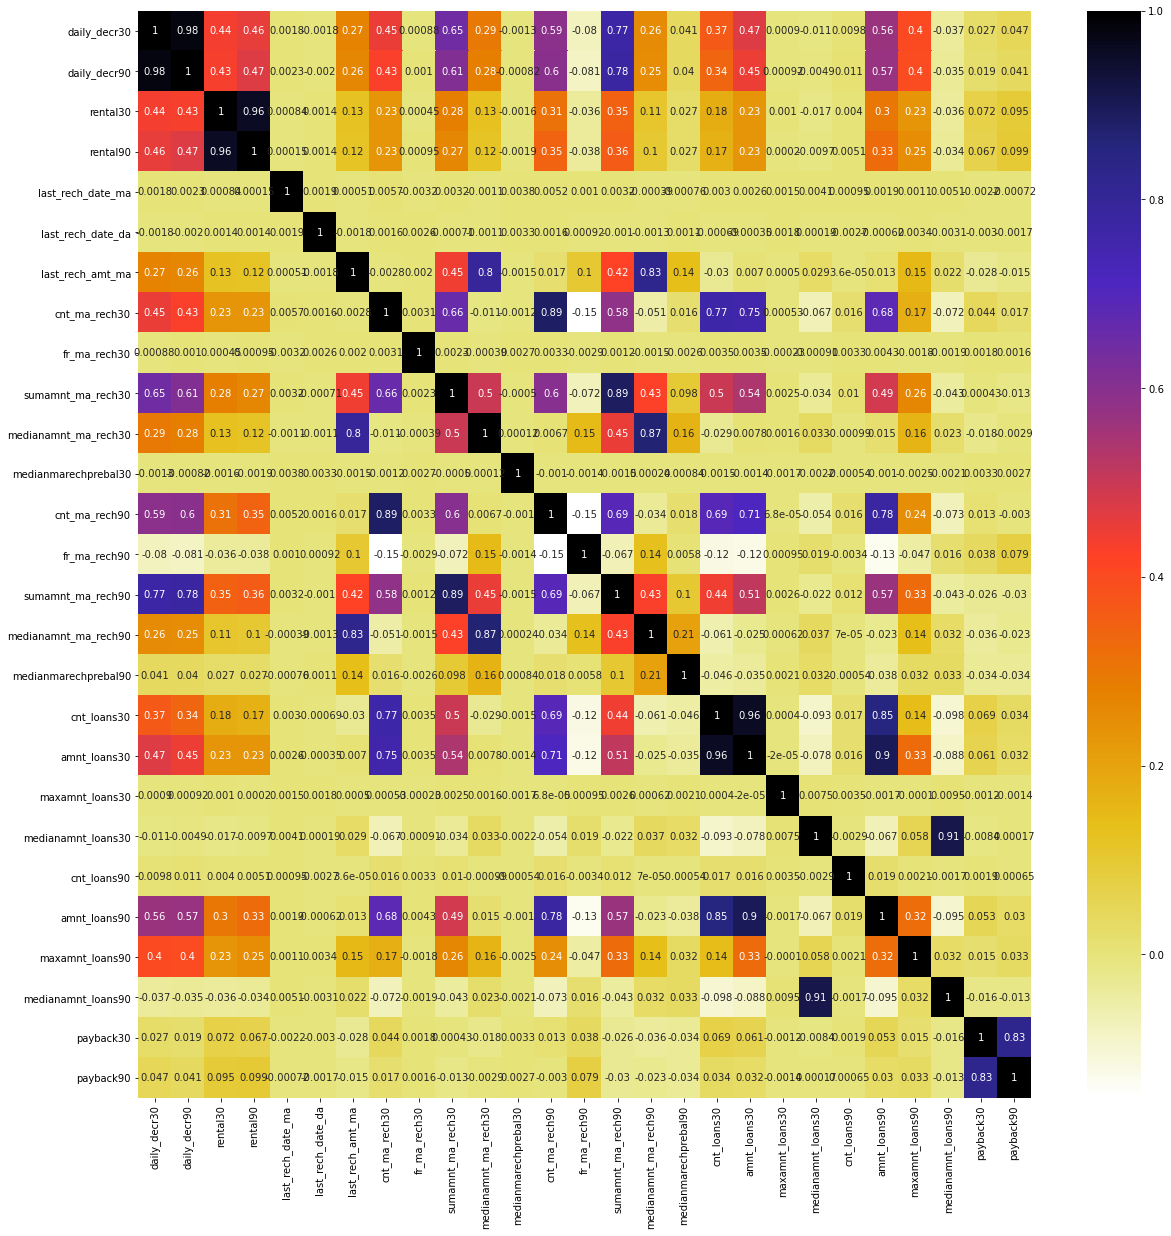

In [55]:
plt.figure(figsize = (20,20))
sns.heatmap(X_train.corr(), annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

### From the heatmap we can observe that few columns are highly correlated with one another, so to avoid risk of erros and high complexity of algo., we will drop any one of them.

In [56]:
# with the following function we can select highly correlated features
# it will remove the second feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in coeff value
                colname = corr_matrix.columns[j]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [57]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

4

In [59]:
corr_features

{'cnt_loans30', 'daily_decr30', 'medianamnt_loans30', 'rental30'}

In [60]:
#Dropping the features seperately in X_train and X_test to avoid any chances of overfitting
X_train = X_train.drop(corr_features, axis = 1)
X_test = X_test.drop(corr_features, axis = 1)
print(X_train.shape)
print(X_test.shape)

(167674, 23)
(41919, 23)


# Model

In [61]:
#saving the imported model to reg 'variable'
reg = LogisticRegression()
reg.fit(X_train,y_train)   #fitting the model to preprocessed data

C:\Users\pankaj verma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
y_pred = reg.predict(X_test)   #predicting the label for X_test variable using the above trained model.
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

# Evaluation of the model

In [63]:
#checking the accuracy of model
print('the accuracy of the model:' ,accuracy_score(y_test, y_pred))

the accuracy of the model: 0.8811994560938954


In [64]:
#visualising performance of an algorithm
cm = confusion_matrix(y_test, y_pred)
cm

array([[  696,  4484],
       [  496, 36243]], dtype=int64)

<AxesSubplot:>

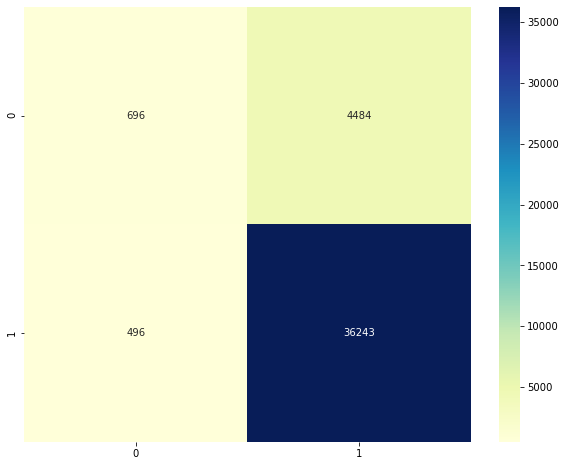

In [65]:
#plotting confusion matrix using heatmap to have better visualisation
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt = 'd')

In [66]:
#actual count of 0 and 1 
y_test.value_counts()

1    36739
0     5180
Name: label, dtype: int64

In [67]:
#predicted count of 0 and 1
y_pred = pd.Series(y_pred)
y_pred.value_counts()

1    40727
0     1192
dtype: int64

In [68]:
#checking the overall pereformance classification report
clf = classification_report(y_test, y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.58      0.13      0.22      5180
           1       0.89      0.99      0.94     36739

    accuracy                           0.88     41919
   macro avg       0.74      0.56      0.58     41919
weighted avg       0.85      0.88      0.85     41919



0(Negative/Failure) = the customer will not be paying back the loaned amount within 5 days of insurance of loan 

1(positive/Success) = the customer will be paying back the loaned amount within 5 days of insurance of loan 



# Deliquency Model using Logistic Regression with an accuracy of approx. 88%